In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading dataset 
zynga_raw = pd.read_excel('Zynga Aggregate v2.xlsx', parse_date = 'Comment Date', delimeter= '\t')

In [3]:
zynga_raw.head()

,Comment Date,Game thankspe,Reply,Comment Message,Likes
0,2019-02-28 21:05:55,HIR,0,iâ€™m going to quit playing hit it rich. it se...,1
1,2019-02-28 21:57:13,HIR,0,thank you very much for the free coins.,2
2,2019-02-28 23:09:22,HIR,0,thanks for the bonus coins. ðÿ¤©ðÿ˜žðÿ’°ðÿ’°ðÿ...,2
3,2019-02-28 21:03:21,HIR,0,thanks for the coins and have a beautiful afte...,1
4,2019-03-01 01:04:10,HIR,0,thsnk you for this bonus coins and help much a...,2


In [4]:
zynga_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115146 entries, 0 to 115145
Data columns (total 5 columns):
Comment  Date      115146 non-null datetime64[ns]
Game thankspe      115146 non-null object
Reply              115146 non-null int64
Comment Message    115143 non-null object
Likes              115146 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.4+ MB


In [5]:
zynga = zynga_raw[['Comment Message', 'Reply', 'Likes', 'Game thankspe', 'Comment  Date']]
zynga = zynga.rename(columns = {'Game thankspe' : 'Game Type'})
zynga.head()

,Comment Message,Reply,Likes,Game Type,Comment Date
0,iâ€™m going to quit playing hit it rich. it se...,0,1,HIR,2019-02-28 21:05:55
1,thank you very much for the free coins.,0,2,HIR,2019-02-28 21:57:13
2,thanks for the bonus coins. ðÿ¤©ðÿ˜žðÿ’°ðÿ’°ðÿ...,0,2,HIR,2019-02-28 23:09:22
3,thanks for the coins and have a beautiful afte...,0,1,HIR,2019-02-28 21:03:21
4,thsnk you for this bonus coins and help much a...,0,2,HIR,2019-03-01 01:04:10


In [6]:
zynga = zynga.dropna()

In [7]:
zynga.isnull().sum()

Comment Message    0
Reply              0
Likes              0
Game Type          0
Comment  Date      0
dtype: int64

In [8]:
zynga = zynga.sample(frac = 0.1, replace = False, random_state=42)

In [9]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [10]:
import string, re
from nltk.corpus import stopwords, words
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\julie
[nltk_data]     diana\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [11]:
#removing non english words
words = set(nltk.corpus.words.words())

In [12]:
def clean_text(text):
    # tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
zynga["Clean Comment"] = zynga["Comment Message"].apply(lambda x: clean_text(x))

In [13]:
zynga.tail()

,Comment Message,Reply,Likes,Game Type,Comment Date,Clean Comment
21077,12 adorable puppies,0,0,HIR,2019-02-03 14:37:59,adorable puppy
61460,thanks,0,1,HIR,2019-03-26 19:02:03,thanks
48518,thanks for the freebies.,0,1,HIR,2019-04-18 14:07:06,thanks freebie
82971,hand one,0,0,POKER,2019-04-23 11:21:17,hand one
54019,thanks for bonus coins,0,0,HIR,2019-04-08 23:12:29,thanks bonus coin


In [14]:
ty_list = ['Thank You','ty','Ty','thanks', 'thankyou','thank you','tysvvm','tyvm','thnx','tx','thank']

In [20]:
#removing non english
from nltk.tokenize import wordpunct_tokenize

def nonenglish(text):
    text = (w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())
    text = [t for t in text if len(t) > 0]
    text = " ".join(text)
    return(text)

zynga["All English"] = zynga["Clean Comment"].apply(lambda x: nonenglish(x))

In [25]:
#checking if removing the non english words did what it had to do
checking = zynga[['Comment Message','Clean Comment', 'All English']]
checking.sample(20)

,Comment Message,Clean Comment,All English
59023,c,,
2954,thanks,thanks,thanks
4537,c thank you,thank,thank
28033,a,,
13099,a a pearl is missing on the strand,pearl miss strand,pearl miss strand
9430,thank you,thank,thank
103334,i already tried the support or emailed them,already tried support email,already tried support
17240,a,,
69137,"it is really exciting , i am just winning away...",really excite win away,really excite win away
111055,i have did the uninstall and reinstall and sti...,uninstall reinstall still nothing actually rei...,reinstall still nothing actually reinstall tha...


In [26]:
#removing null again
zynga = zynga.dropna()
zynga.isnull().sum()

Comment Message    0
Reply              0
Likes              0
Game Type          0
Comment  Date      0
Clean Comment      0
All English        0
dtype: int64

In [27]:
zynga.shape

(11514, 7)

In [28]:
checkingw = zynga[['Clean Comment', 'All English']]
checkingw.tail(100)

,Clean Comment,All English
16584,thanks coin,thanks coin
100299,play time high first place,play time high first place
61266,horse also rectangular pupil goat horse pitch ...,horse also rectangular pupil goat horse pitch ...
61381,thanksm,
100252,ø§ø®ø¯ùˆ ù…ù†ùš ù¨ù ø¨ù„ùšùˆù†,§ ® ¯ … † ¨ ¨ „ †
67281,low,low
39345,thanks breakfast coin,thanks breakfast coin
68298,lose spin give today...help,lose spin give today ... help
41550,thanks,thanks
57008,eyebrow eye color different in(c thanks coin,eyebrow eye color different in ( c thanks coin


In [29]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
zynga["Sentiments"] = zynga["All English"].apply(lambda x: sid.polarity_scores(x))
zynga = pd.concat([zynga.drop(['Sentiments'], axis=1), zynga['Sentiments'].apply(pd.Series)], axis=1)

In [30]:
# add number of characters column
zynga["nb_chars"] = zynga["Comment Message"].apply(lambda x: len(x))

# add number of words column
zynga["nb_words"] = zynga["Comment Message"].apply(lambda x: len(x.split(" ")))

In [31]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [32]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(zynga["All English"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = zynga["All English"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
zynga = pd.concat([zynga, doc2vec_df], axis=1)

C:\Users\julie diana\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [33]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(zynga["All English"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = zynga.index
zynga = pd.concat([zynga, tfidf_df], axis=1)

In [34]:
zynga.head(1)

,Comment Message,Reply,Likes,Game Type,Comment Date,Clean Comment,All English,neg,neu,pos,...,word_wrong,word_ya,word_yeah,word_year,word_yes,word_yesterday,word_yet,word_yo,word_you,word_zero
53594,i agree we should be able to use all of the fr...,1,4,HIR,2019-04-09 22:12:19,agree able use free spin get friends...and los...,agree able use free spin get ... and lose coin...,0.124,0.461,0.415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
zynga.shape

(11514, 543)

In [36]:
# show Reply distribution
zynga["Reply"].value_counts()

0    10237
1     1277
Name: Reply, dtype: int64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Comment Thread Distribution')

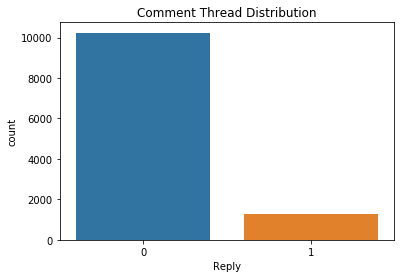

In [38]:
#distribution of imbalanced class
sns.countplot(zynga['Reply'])
#sns.countplot(kill.manner_of_death)
plt.title("Comment Thread Distribution",color = 'black',fontsize=12)

In [39]:
checkingsentiment = zynga[['All English', 'neu', 'pos', 'neg']].sample(n=10)
checkingsentiment

,All English,neu,pos,neg
114996,mine make that ' s odd,0.566,0.000,0.434
7335,,0.000,0.000,0.000
79940,thank,0.000,1.000,0.000
112586,dae especially put thing sale,1.000,0.000,0.000
64982,could use huge win again . not get coin think ...,0.663,0.337,0.000
40991,thank,0.000,1.000,0.000
25405,,0.000,0.000,0.000
94650,message send kindly respond positively thanks,0.240,0.760,0.000
3231,thanks,0.000,1.000,0.000
37937,thanks,0.000,1.000,0.000


In [40]:
# wordcloud function
import os
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

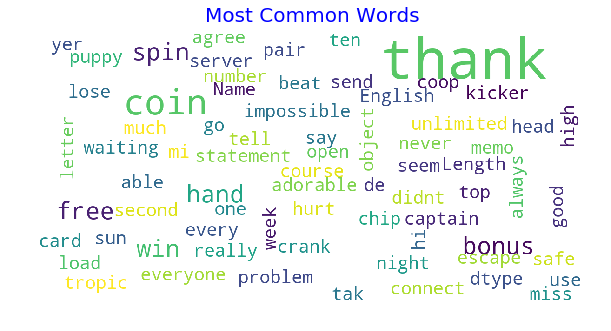

In [41]:
#Original Comments
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 500,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2)

    plt.imshow(wordcloud)
    plt.title("Most Common Words",color = 'Blue',fontsize=20)
    plt.show()
    
# print wordcloud	


show_wordcloud(zynga['All English'])

In [43]:
# highest positive sentiment reviews (with more than 5 words)
zynga[zynga["nb_words"] >= 10].sort_values("pos", ascending = False)[["Comment Message","pos", "Likes"]].head(10)

,Comment Message,pos,Likes
96610,yehya khalilya hmar hayda byetla3ab w2t zan2a ...,1.000,0
94497,her yerde her platformda sizi åÿikayet edicem....,1.000,0
101901,straight flush....3 to 7 of diamonds.,1.000,0
44524,thanks b,1.000,0
76876,b thank you,1.000,0
40375,"thank you, it has been fun and relaxing playin...",1.000,0
101689,"the straight flush wins this hand. 3, 7 of dia...",0.919,0
40037,you're very welcome & thank you for the huge g...,0.915,1
49782,"congratulations to all the winners, thank you ...",0.911,0
96577,hand 1. pair of 5.. hand 2 is not a straight,0.892,6


In [44]:
# lowest negative sentiment reviews (with more than 5 words)
zynga[zynga["nb_words"] >= 10].sort_values("neg", ascending = False)[["Comment Message","neg", "Likes"]].head(10)

,Comment Message,neg,Likes
111687,sorry my mistke it is 136 982 475,1.000,0
90848,uã§k uã§k ã§a paska prit me tba zynga po mvjen...,1.000,0
91770,"i lose 40b today, loss with 77 and i have kk",0.833,1
68930,all i get is error error error whatâ€™s going on,0.730,0
105178,"not that i'm complaining, but i've had it for ...",0.714,0
95593,before zynga was beter than now now i dont lik...,0.678,0
38898,carol i have had the same problem i have had 1...,0.659,0
101657,straightflush but your gonna call with the boa...,0.659,0
78018,itâ€™s the beginning of the month.... they ste...,0.658,0
107131,as confused as we are because the falls aren't...,0.655,1


C:\Users\julie diana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


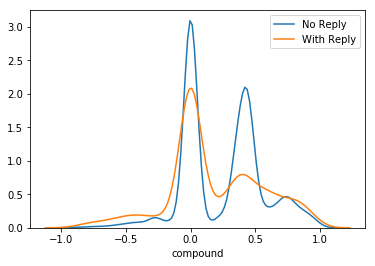

In [45]:
# plot sentiment distribution for positive and negative reviews. This is the imbalanced class
import seaborn as sns

for x in [0, 1]:
    subset = zynga[zynga['Reply'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "No Reply"
    else:
        label = "With Reply"
    sns.distplot(subset['compound'], hist = False, label = label)

In [46]:
#using smothe to balance the class
#pip install imblearn
#from imblearn.over_sampling import SMOTE

In [47]:
zynga.columns

Index(['Comment Message', 'Reply', 'Likes', 'Game Type', 'Comment  Date',
       'Clean Comment', 'All English', 'neg', 'neu', 'pos',
       ...
       'word_wrong', 'word_ya', 'word_yeah', 'word_year', 'word_yes',
       'word_yesterday', 'word_yet', 'word_yo', 'word_you', 'word_zero'],
      dtype='object', length=543)

In [48]:
# feature selection
label = "Reply"
ignore_cols = [label, "Comment Message", "Clean Comment", "Likes", "Game Type", "All English", "Comment  Date"]
features = [c for c in zynga.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(zynga[features], zynga[label], test_size = 0.20, random_state = 42)

In [49]:
#here you can see imbalance in the dataset
y_train.value_counts()

0    8184
1    1027
Name: Reply, dtype: int64

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

In [51]:
#fit SMOTE
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [53]:
#now recheck the amount of records in each category
np.bincount(y_train)

array([8184, 8184], dtype=int64)

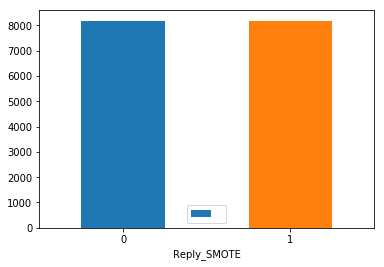

In [54]:
>>> df = pd.DataFrame({'Reply_SMOTE':['0', '1'], ' ':[8184, 8184]})
>>> ax = df.plot.bar(x='Reply_SMOTE', y=' ', rot=1)


In [55]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\julie diana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.790273556231003

In [56]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

In [57]:
#fitting the classifier
accuracy_score(y_test, y_pred)

0.790273556231003

In [58]:
#checking confusion matrix
confusion_matrix(y_test, y_pred)

array([[1632,  421],
       [  62,  188]], dtype=int64)

In [59]:
#checking recall score
recall_score(y_test, y_pred)

0.752

In [60]:
#checking recall score
average_precision_score(y_test, y_pred)

0.25906590603959856

In [61]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
4,nb_chars,0.116599
5,nb_words,0.089620
9,doc2vec_vector_3,0.056628
8,doc2vec_vector_2,0.055260
1,neu,0.047191
6,doc2vec_vector_0,0.041265
7,doc2vec_vector_1,0.040144
10,doc2vec_vector_4,0.039053
2,pos,0.037479
3,compound,0.036518


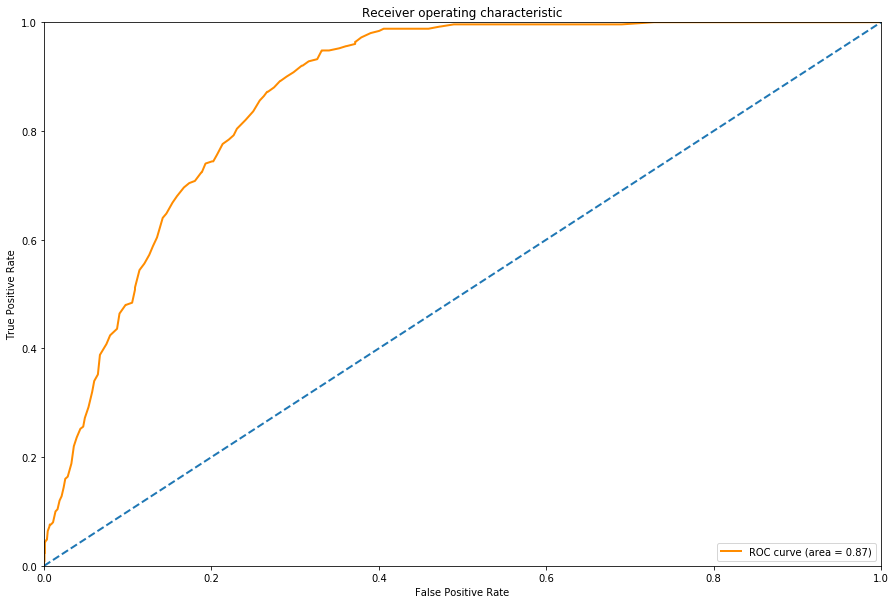

In [64]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.39')

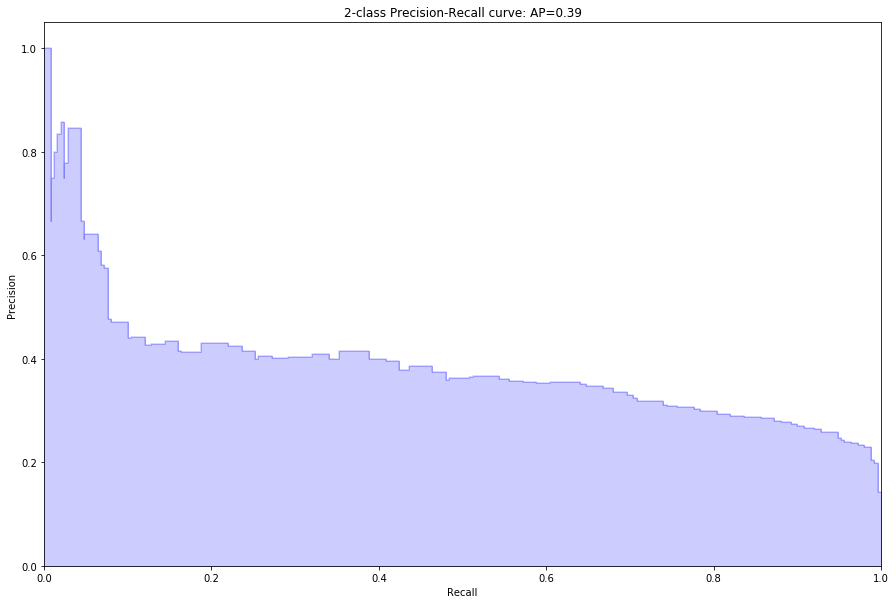

In [65]:
# PR curve
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
